<a href="https://colab.research.google.com/github/ramrajv/Study_Group/blob/main/Bagging_adaboost_GBM_XGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.


Best explaination for Out_of_bag score: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)

In [6]:
df['pclass'].unique()

array([1, 3, 2])

In [7]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

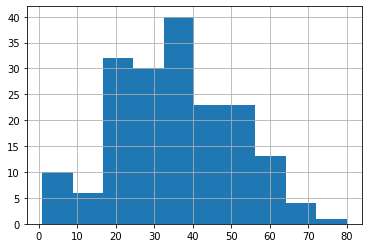

In [10]:
df['age'].hist();

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

# Fit Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

## Decision Tree

In [25]:
clf = DecisionTreeClassifier(random_state=42)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        41
           1       0.99      0.91      0.95        86

    accuracy                           0.93       127
   macro avg       0.91      0.94      0.92       127
weighted avg       0.94      0.93      0.93       127


Confusion Matrix: 
 [[40  1]
 [ 8 78]]

Average Accuracy: 	 0.7954
Accuracy SD: 		 0.0448


In [28]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.90      0.73      0.81        37

    accuracy                           0.76        55
   macro avg       0.75      0.78      0.75        55
weighted avg       0.80      0.76      0.77        55


Confusion Matrix: 
 [[15  3]
 [10 27]]



## Bagging (oob_score=False)
#### do not use out-of-bag samples to estimate the generalization accuracy

In [29]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [30]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [31]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.95      0.94      0.95        86

    accuracy                           0.93       127
   macro avg       0.92      0.92      0.92       127
weighted avg       0.93      0.93      0.93       127


Confusion Matrix: 
 [[37  4]
 [ 5 81]]

Average Accuracy: 	 0.7874
Accuracy SD: 		 0.0689


In [32]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.90      0.76      0.82        37

    accuracy                           0.78        55
   macro avg       0.76      0.80      0.77        55
weighted avg       0.81      0.78      0.79        55


Confusion Matrix: 
 [[15  3]
 [ 9 28]]



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [33]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [34]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [35]:
bag_clf.oob_score_

0.7637795275590551

In [36]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.95      0.94      0.95        86

    accuracy                           0.93       127
   macro avg       0.92      0.92      0.92       127
weighted avg       0.93      0.93      0.93       127


Confusion Matrix: 
 [[37  4]
 [ 5 81]]

Average Accuracy: 	 0.7874
Accuracy SD: 		 0.0689


In [37]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.90      0.76      0.82        37

    accuracy                           0.78        55
   macro avg       0.76      0.80      0.77        55
weighted avg       0.81      0.78      0.79        55


Confusion Matrix: 
 [[15  3]
 [ 9 28]]



# Boosting (Hypothesis Boosting)

* Combine several weak learners into a strong learner. 

* Train predictors sequentially

# AdaBoost / Adaptive Boosting

[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada_clf = AdaBoostClassifier()

In [40]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

[SAMME16 or SAMME R](https://web.stanford.edu/~hastie/Papers/samme.pdf) (Stagewise Additive Modeling using a Multiclass Exponential loss function).

R stands for real

In [41]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8346

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.87      0.88      0.88        86

    accuracy                           0.83       127
   macro avg       0.81      0.81      0.81       127
weighted avg       0.83      0.83      0.83       127


Confusion Matrix: 
 [[30 11]
 [10 76]]

Average Accuracy: 	 0.7009
Accuracy SD: 		 0.0292


In [42]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.6364

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.61      0.52        18
           1       0.77      0.65      0.71        37

    accuracy                           0.64        55
   macro avg       0.62      0.63      0.61        55
weighted avg       0.67      0.64      0.65        55


Confusion Matrix: 
 [[11  7]
 [13 24]]



## AdaBoost with Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_jobs=-1, verbose = 1))

In [45]:
ada_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parall

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1, verbose=1))

In [46]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

accuracy score: 0.9291



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.93      0.97      0.95        86

    accuracy                           0.93       127
   macro avg       0.93      0.91      0.92       127
weighted avg       0.93      0.93      0.93       127




[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

Confusion Matrix: 
 [[35  6]
 [ 3 83]]



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0

Average Accuracy: 	 0.7560
Accuracy SD: 		 0.0523


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [47]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Test Result:



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

accuracy score: 0.8182



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.91      0.81      0.86        37

    accuracy                           0.82        55
   macro avg       0.80      0.82      0.80        55
weighted avg       0.83      0.82      0.82        55




[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

Confusion Matrix: 
 [[15  3]
 [ 7 30]]



***

# Gradient Boosting / Gradient Boosting Machine (GBM)

Works for both regression and classification

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

* Sequentially adding predictors
* Each one correcting its predecessor
* Fit new predictor to the residual errors

Compare this to AdaBoost: 
* Alter instance weights at every iteration


**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, by adding weighting  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9291

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.96      0.93      0.95        86

    accuracy                           0.93       127
   macro avg       0.91      0.93      0.92       127
weighted avg       0.93      0.93      0.93       127


Confusion Matrix: 
 [[38  3]
 [ 6 80]]

Average Accuracy: 	 0.7797
Accuracy SD: 		 0.0296


In [51]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.90      0.73      0.81        37

    accuracy                           0.76        55
   macro avg       0.75      0.78      0.75        55
weighted avg       0.80      0.76      0.77        55


Confusion Matrix: 
 [[15  3]
 [10 27]]



***

# XGBoost (Extreme Gradient Boosting)

[Documentation](http://xgboost.readthedocs.io/en/latest/)

[tqchen github](https://github.com/tqchen/xgboost/tree/master/demo/guide-python)

[dmlc github](https://github.com/dmlc/xgboost)

* “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. 
* XGBoost is based on this original model. 

* Supervised Learning

## Objective Function : Training Loss + Regularization

$$Obj(Θ)=L(θ)+Ω(Θ)$$

* $L$ is the training loss function, and 
* $Ω$ is the regularization term. 

### Training Loss

The training loss measures how predictive our model is on training data.

Example 1, Mean Squared Error for Linear Regression:

$$L(θ)= \sum_i(y_i-\hat{y}_i)^2$$

Example 2, Logistic Loss for Logistic Regression:

$$ L(θ) = \sum_i \large[ y_i ln(1 + e^{-\hat{y}_i}) + (1-y_i) ln(1 + e^{\hat{y}_i}) \large] $$

### Regularization Term

The regularization term controls the complexity of the model, which helps us to avoid overfitting. 

[XGBoost vs GBM](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting/answer/Tianqi-Chen-1)

* Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

* More suitable for Complex/High Dimension data

* For model, it might be more suitable to be called as regularized gradient boosting.



In [52]:
import xgboost as xgb

In [53]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=-1, verbosity=1, gpu_id=0)

In [54]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(gpu_id=0, learning_rate=0.3, max_depth=7, n_estimators=300,
              n_jobs=-1)

In [55]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9055

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.94      0.92      0.93        86

    accuracy                           0.91       127
   macro avg       0.89      0.90      0.89       127
weighted avg       0.91      0.91      0.91       127


Confusion Matrix: 
 [[36  5]
 [ 7 79]]

Average Accuracy: 	 0.8028
Accuracy SD: 		 0.0567


In [56]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.93      0.70      0.80        37

    accuracy                           0.76        55
   macro avg       0.76      0.80      0.76        55
weighted avg       0.82      0.76      0.77        55


Confusion Matrix: 
 [[16  2]
 [11 26]]



In [57]:
from sklearn.pipeline import Pipeline

In [58]:
from sklearn.model_selection import GridSearchCV 

In [59]:
pipeline_xgb = Pipeline([('xgb', xgb.XGBClassifier(max_depth=5,
                                                    n_estimators=2000,
                                                    learning_rate=0.3,
                                                    n_jobs=-1, gpu_id=0))])

In [60]:
params_xgb = {'xgb__max_depth':(5, 12, 15, 20, 25, 30),
               'xgb__n_estimators':(1000, 2000, 5000, 7000, 9000),
               'xgb__learning_rate':(0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9)} 

In [61]:
xgb_grid_pipeline = GridSearchCV(pipeline_xgb,
                                 params_xgb,
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=1,
                                 scoring='accuracy')

In [62]:
xgb_grid_pipeline.fit(X_train,y_train) 

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(gpu_id=0,
                                                      learning_rate=0.3,
                                                      max_depth=5,
                                                      n_estimators=2000,
                                                      n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': (0.1, 0.2, 0.3, 0.4, 0.5, 0.7,
                                                0.9),
                         'xgb__max_depth': (5, 12, 15, 20, 25, 30),
                         'xgb__n_estimators': (1000, 2000, 5000, 7000, 9000)},
             scoring='accuracy', verbose=1)

In [63]:
xgb_grid_pipeline.best_score_

0.8107692307692307

In [64]:
best = xgb_grid_pipeline.best_estimator_.get_params() 

In [65]:
best

{'memory': None,
 'steps': [('xgb',
   XGBClassifier(gpu_id=0, learning_rate=0.2, max_depth=5, n_estimators=7000,
                 n_jobs=-1))],
 'verbose': False,
 'xgb': XGBClassifier(gpu_id=0, learning_rate=0.2, max_depth=5, n_estimators=7000,
               n_jobs=-1),
 'xgb__base_score': 0.5,
 'xgb__booster': 'gbtree',
 'xgb__colsample_bylevel': 1,
 'xgb__colsample_bynode': 1,
 'xgb__colsample_bytree': 1,
 'xgb__gamma': 0,
 'xgb__gpu_id': 0,
 'xgb__learning_rate': 0.2,
 'xgb__max_delta_step': 0,
 'xgb__max_depth': 5,
 'xgb__min_child_weight': 1,
 'xgb__missing': None,
 'xgb__n_estimators': 7000,
 'xgb__n_jobs': -1,
 'xgb__nthread': None,
 'xgb__objective': 'binary:logistic',
 'xgb__random_state': 0,
 'xgb__reg_alpha': 0,
 'xgb__reg_lambda': 1,
 'xgb__scale_pos_weight': 1,
 'xgb__seed': None,
 'xgb__silent': None,
 'xgb__subsample': 1,
 'xgb__verbosity': 1}

In [66]:
y_test_pred = xgb_grid_pipeline.predict(X_test)

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[15,  3],
       [ 8, 29]])

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.8231
Recall Score: 		 0.8000
F1 Score: 		 0.8049


***